# 1. Import and Install Dependencies

In [2]:
# !pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [6]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [7]:
mp_holistic = mp.solutions.holistic # Holistic model for detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities for draw them

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [15]:
def draw_styled_landmarks(image, results):
    # Draw face connections
#     mp_drawing.draw_landmarks(image, results.face_landmarks,mp_holistic.FACEMESH_CONTOURS, 
#                              mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
#                              mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                              ) 
    # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
#                              mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
#                              mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
#                              ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [84]:
# cv2.cvtColor??

In [16]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [17]:
draw_styled_landmarks(image, results)

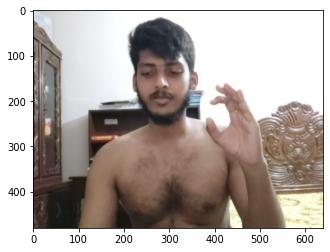

In [18]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [19]:
len(results.pose_landmarks.landmark)

33

In [20]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [21]:
len(pose)

33

In [22]:
#flatten amke 1d array
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)

In [23]:
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten()

In [24]:
lh

array([ 7.26762056e-01,  6.86065316e-01, -1.55501169e-07,  6.81208193e-01,
        6.45446897e-01, -4.37218603e-03,  6.44495010e-01,  5.87499976e-01,
       -1.37066869e-02,  6.14792347e-01,  5.53959429e-01, -2.72176173e-02,
        6.08965039e-01,  5.10355771e-01, -3.94341461e-02,  6.90895498e-01,
        4.88636523e-01,  1.04470151e-02,  6.76444113e-01,  4.18208897e-01,
       -1.39518008e-02,  6.49499416e-01,  4.08823490e-01, -3.69551703e-02,
        6.24038339e-01,  4.17162389e-01, -4.99558821e-02,  7.08972156e-01,
        4.89129424e-01, -5.27290103e-04,  6.91435277e-01,  4.13062811e-01,
       -1.74454972e-02,  6.66248620e-01,  3.78303349e-01, -3.38119082e-02,
        6.41155243e-01,  3.58643353e-01, -4.44326364e-02,  7.29862034e-01,
        5.01158953e-01, -1.59956403e-02,  7.12235808e-01,  4.22404528e-01,
       -2.86301952e-02,  6.88619316e-01,  3.82198751e-01, -3.66841033e-02,
        6.65699065e-01,  3.54784369e-01, -4.18393575e-02,  7.50026405e-01,
        5.23398042e-01, -

In [25]:
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten()if results.right_hand_landmarks else np.zeros(21*3)

In [25]:
rh

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
lh

array([ 7.26762056e-01,  6.86065316e-01, -1.55501169e-07,  6.81208193e-01,
        6.45446897e-01, -4.37218603e-03,  6.44495010e-01,  5.87499976e-01,
       -1.37066869e-02,  6.14792347e-01,  5.53959429e-01, -2.72176173e-02,
        6.08965039e-01,  5.10355771e-01, -3.94341461e-02,  6.90895498e-01,
        4.88636523e-01,  1.04470151e-02,  6.76444113e-01,  4.18208897e-01,
       -1.39518008e-02,  6.49499416e-01,  4.08823490e-01, -3.69551703e-02,
        6.24038339e-01,  4.17162389e-01, -4.99558821e-02,  7.08972156e-01,
        4.89129424e-01, -5.27290103e-04,  6.91435277e-01,  4.13062811e-01,
       -1.74454972e-02,  6.66248620e-01,  3.78303349e-01, -3.38119082e-02,
        6.41155243e-01,  3.58643353e-01, -4.44326364e-02,  7.29862034e-01,
        5.01158953e-01, -1.59956403e-02,  7.12235808e-01,  4.22404528e-01,
       -2.86301952e-02,  6.88619316e-01,  3.82198751e-01, -3.66841033e-02,
        6.65699065e-01,  3.54784369e-01, -4.18393575e-02,  7.50026405e-01,
        5.23398042e-01, -

In [16]:
np.zeros(21*3) # so that it will not give us error if a lanmark is absent

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
#finally

pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [28]:
lh

array([ 7.26762056e-01,  6.86065316e-01, -1.55501169e-07,  6.81208193e-01,
        6.45446897e-01, -4.37218603e-03,  6.44495010e-01,  5.87499976e-01,
       -1.37066869e-02,  6.14792347e-01,  5.53959429e-01, -2.72176173e-02,
        6.08965039e-01,  5.10355771e-01, -3.94341461e-02,  6.90895498e-01,
        4.88636523e-01,  1.04470151e-02,  6.76444113e-01,  4.18208897e-01,
       -1.39518008e-02,  6.49499416e-01,  4.08823490e-01, -3.69551703e-02,
        6.24038339e-01,  4.17162389e-01, -4.99558821e-02,  7.08972156e-01,
        4.89129424e-01, -5.27290103e-04,  6.91435277e-01,  4.13062811e-01,
       -1.74454972e-02,  6.66248620e-01,  3.78303349e-01, -3.38119082e-02,
        6.41155243e-01,  3.58643353e-01, -4.44326364e-02,  7.29862034e-01,
        5.01158953e-01, -1.59956403e-02,  7.12235808e-01,  4.22404528e-01,
       -2.86301952e-02,  6.88619316e-01,  3.82198751e-01, -3.66841033e-02,
        6.65699065e-01,  3.54784369e-01, -4.18393575e-02,  7.50026405e-01,
        5.23398042e-01, -

In [18]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [31]:
extract_keypoints(results).shape

(1662,)

In [32]:
result_test = extract_keypoints(results)

In [33]:
result_test

array([ 0.24540535,  0.55191612, -0.75262135, ...,  0.        ,
        0.        ,  0.        ])

In [34]:
np.save('0', result_test)

In [35]:
np.load('0.npy')

array([ 0.24540535,  0.55191612, -0.75262135, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [37]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you


In [38]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [39]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

KeyboardInterrupt: 

# 6. Preprocess Data and Create Labels and Features

In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [21]:
label_map = {label:num for num, label in enumerate(actions)}

In [22]:
label_map 

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [23]:
sequences, labels = [], [] #2 blank array represent x y data label
#each of action
for action in actions: 
    #each of no_sequences
    for sequence in range(no_sequences):
        window = [] # represents differnt of frames for particular  sequences
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [24]:
np.array(sequences).shape

(90, 30, 1662)

In [25]:
np.array(labels).shape

(90,)

In [26]:
X = np.array(sequences)

In [27]:
X.shape

(90, 30, 1662)

In [28]:
y = to_categorical(labels).astype(int)

In [49]:
# y

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [30]:

y_test.shape


(5, 3)

# 7. Build and Train LSTM Neural Network

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense #LSTM temporal action detect and fully connected layer
from tensorflow.keras.callbacks import TensorBoard  #for logging

In [32]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [33]:
model = Sequential() #Sequential API
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662))) #64 lstm units
model.add(LSTM(128, return_sequences=True, activation='relu'))#128 lstm units
model.add(LSTM(64, return_sequences=False, activation='relu'))  #64 lstm units #3 st of LSTM Layers False cause dense layer 
model.add(Dense(64, activation='relu')) 
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [34]:
X.shape

(90, 30, 1662)

In [48]:
actions.shape[0]

3

In [36]:
res=[.7,0.2,0.1]


In [37]:
actions[np.argmax(res)]


'hello'

In [38]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [54]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 1s 288ms/step - loss: 0.9048 - categorical_accuracy: 0.5529
Epoch 2/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8884 - categorical_accuracy: 0.6000
Epoch 3/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.9106 - categorical_accuracy: 0.6588
Epoch 4/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.9102 - categorical_accuracy: 0.5647
Epoch 5/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8957 - categorical_accuracy: 0.6353
Epoch 6/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.8882 - categorical_accuracy: 0.6353
Epoch 7/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8701 - categorical_accuracy: 0.6471
Epoch 8/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.8751 - categorical_accuracy: 0.6118
Epoch 9/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.8666 - categorical_accuracy: 0.6706


3/3 [==============================] - 0s 55ms/step - loss: 0.4746 - categorical_accuracy: 0.7765
Epoch 147/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4738 - categorical_accuracy: 0.8353
Epoch 148/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.4603 - categorical_accuracy: 0.8235
Epoch 149/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4833 - categorical_accuracy: 0.8000
Epoch 150/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.4578 - categorical_accuracy: 0.7412
Epoch 151/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.4644 - categorical_accuracy: 0.8353
Epoch 152/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4348 - categorical_accuracy: 0.8706
Epoch 153/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4780 - categorical_accuracy: 0.7882
Epoch 154/2000
3/3 [==============================] - 0s 53ms/step - loss: 0.4623 - categorical_accuracy: 0.752

3/3 [==============================] - 0s 53ms/step - loss: 0.3133 - categorical_accuracy: 0.9176
Epoch 291/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3227 - categorical_accuracy: 0.8824
Epoch 292/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.3198 - categorical_accuracy: 0.8588
Epoch 293/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3615 - categorical_accuracy: 0.8706
Epoch 294/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.2981 - categorical_accuracy: 0.9059
Epoch 295/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.3075 - categorical_accuracy: 0.8706
Epoch 296/2000
3/3 [==============================] - 0s 64ms/step - loss: 0.3262 - categorical_accuracy: 0.8588
Epoch 297/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.3046 - categorical_accuracy: 0.8824
Epoch 298/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.3117 - categorical_accuracy: 0.882

3/3 [==============================] - 0s 60ms/step - loss: 0.4900 - categorical_accuracy: 0.7765
Epoch 435/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4931 - categorical_accuracy: 0.7294
Epoch 436/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.4324 - categorical_accuracy: 0.8588
Epoch 437/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.3727 - categorical_accuracy: 0.8235
Epoch 438/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3177 - categorical_accuracy: 0.9059
Epoch 439/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.3153 - categorical_accuracy: 0.8706
Epoch 440/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.2822 - categorical_accuracy: 0.9176
Epoch 441/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2822 - categorical_accuracy: 0.8706
Epoch 442/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.2639 - categorical_accuracy: 0.905

KeyboardInterrupt: 

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            442112    
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
__________________________________________________

# 8. Make Predictions

In [40]:
res = model.predict(X_test)

In [46]:
actions[np.argmax(res[3])]

'thanks'

In [45]:
actions[np.argmax(y_test[3])]

'hello'

# 9. Save Weights

In [63]:
model.save('action.h5')

In [64]:

del model

In [47]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [60]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [72]:
# yhat = model.predict(X_test)
yhat = model.predict(X_test)

In [73]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()



In [74]:
yhat


[0, 0, 0, 0, 0]

In [75]:
ytrue

[0, 0, 0, 0, 2]

In [76]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[0, 1],
        [0, 4]],

       [[4, 0],
        [1, 0]]], dtype=int64)

In [77]:
accuracy_score(ytrue, yhat)

0.8

In [78]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

AxisError: axis 1 is out of bounds for array of dimension 1

In [66]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[53,  6],
        [ 4, 22]],

       [[55,  0],
        [ 1, 29]],

       [[52,  4],
        [ 5, 24]]], dtype=int64)

In [67]:
accuracy_score(ytrue, yhat)

0.8823529411764706

# 11. Test in Real Time

In [6]:
import matplotlib.pyplot as plt

In [79]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

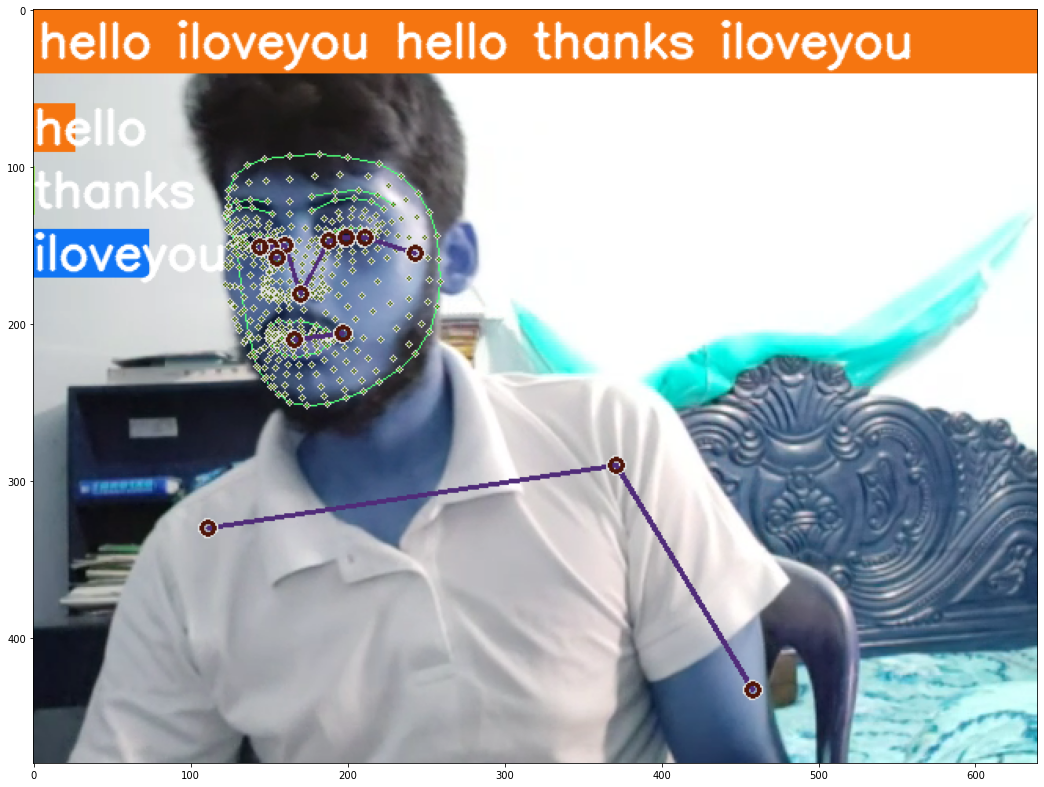

In [80]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [103]:
#1. New detection variables
sequence=[] #Collect 30 frames
sentence=[] #Conacdinate history togather
threshold=0.7

# cap=cv2.VideoCapture(0)
# #Set mediapipe model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#        #Read feed
#        ret,frame=cap.read()
#        #Make detections
#        image,results=mediapipe_detection(frame,holistic)
# #        print(results)
#        #Draw Landmarks
#        draw_styled_landmarks(image,results)
        
#         # 2. Prediction logic
#        keypoints = extract_keypoints(results)
# #         sequence.insert(0,keypoints)
# #         sequence = sequence[:30]
#        sequence.append(keypoints)
#        sequence = sequence[-30:]
        
#        if len(sequence) == 30:
#             res = model.predict(np.expand_dims(sequence, axis=0))[0]
#             print(actions[np.argmax(res)])
            
        
#        #Show to screen
#        cv2.imshow('OpenCV Feed',image)
#        #Break gracefully
#       if cv2.waitkey(10)&0xFF == ord('q'):
#              break
#     cap.release()
#     cv2.destroyAllwindows()
    
    
# 1. New detection variables
# sequence = []
# sentence = []
# threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]: #current sent doest not == last sentence
                        sentence.append(actions[np.argmax(res)]) # no duplicate sentence
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
        if  len(sentence) == 0:   
            cv2.rectangle(image, (0,0), (300, 60), (0,0,0), -1)
            cv2.putText(image, ' '.join(sentence), (3,30), 
                           cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        else:
            cv2.rectangle(image, (0,0), (300, 60), (0,0,0), -1)
            cv2.putText(image, ' '.join(sentence[-1]), (3,30), 
                           cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
hello
<class 'mediapipe.pyth

In [106]:
np.expand_dims(X_test[0],axis=0).shape

(1, 30, 1662)

In [111]:
(no_sequences,30,1662)

(30, 30, 1662)

In [112]:
model.predict(np.expand_dims(X_test[0],axis=0)) # predict 1 sequence at a time


array([[1.34041430e-02, 1.18546595e-05, 9.86584008e-01]], dtype=float32)

NameError: name 'cap' is not defined